In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np


df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#### Data Prep:
Unamed column represents news which doesnt describe much as im not sure what it actually represents

In [ ]:
df.drop('Unnamed: 0', axis= 1, inplace = True)

In [88]:
x_values = df['text']
y_values = df['label']


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size = 0.2)

In [90]:
vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 1.0)
#stop words are common words in a language to be filtered out
train_x = vectorizer.fit_transform(x_train)
test_x = vectorizer.transform(x_test)

#### Linear SVM

In [103]:
from sklearn import svm

clf_svm = svm.SVC(kernel = 'linear')
clf_svm.fit(train_x, y_train)
clf_svm.score(test_x,y_test)

0.9408050513022889

#### Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()
clf_tree.fit(train_x, y_train)
clf_tree.score(test_x,y_test)

0.8097868981846882

#### Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression()
clf_log.fit(train_x, y_train)
clf_log.score(test_x, y_test)

0.9139700078926598

#### Passive Aggressive Classifier

In [104]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf_pac = PassiveAggressiveClassifier()
clf_pac.fit(train_x,y_train)
clf_pac.score(test_x,y_test)

0.9447513812154696

In [106]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

confusion_matrix(y_test, clf_pac.predict(test_x))

array([[585,  27],
       [ 43, 612]], dtype=int64)

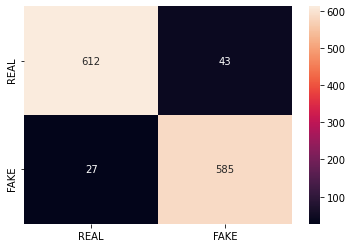

In [111]:
labels = ['REAL','FAKE']
cm = confusion_matrix(y_test, clf_pac.predict(test_x), labels = labels)
df_cm = pd.DataFrame(cm, index = labels, columns = labels)
sn.heatmap(df_cm, annot=True, fmt='d')

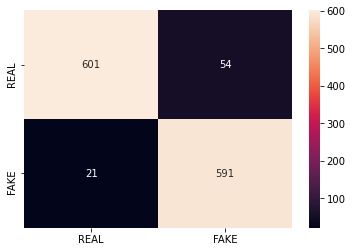

In [112]:
labels = ['REAL','FAKE']
cm = confusion_matrix(y_test, clf_svm.predict(test_x), labels = labels)
df_cm = pd.DataFrame(cm, index = labels, columns = labels)
sn.heatmap(df_cm, annot=True, fmt='d')

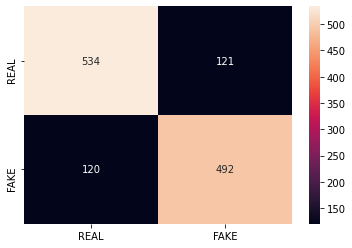

In [113]:
labels = ['REAL','FAKE']
cm = confusion_matrix(y_test, clf_tree.predict(test_x), labels = labels)
df_cm = pd.DataFrame(cm, index = labels, columns = labels)
sn.heatmap(df_cm, annot=True, fmt='d')

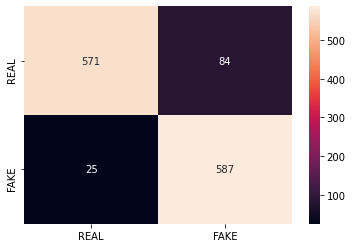

In [114]:
labels = ['REAL','FAKE']
cm = confusion_matrix(y_test, clf_log.predict(test_x), labels = labels)
df_cm = pd.DataFrame(cm, index = labels, columns = labels)
sn.heatmap(df_cm, annot=True, fmt='d')